In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('final_dataset.csv')

Convert Dates

In [11]:
df['Date_full'] = pd.to_datetime({
    'year': df['Year'],
    'month': df['Month'],
    'day': df['Date']
})

Plot AQI vs Time

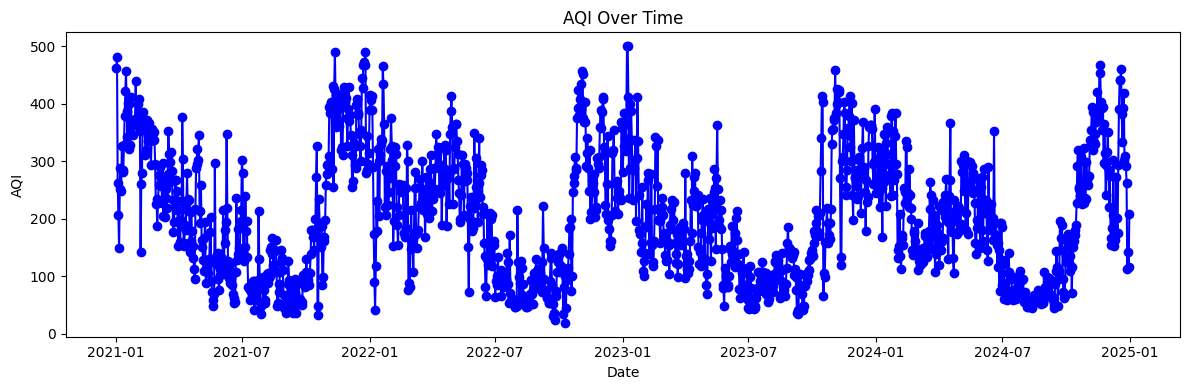

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date_full'], df['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Over Time')
plt.tight_layout()
plt.show()

Plot Avg AQI for each Month

Years in dataset: [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


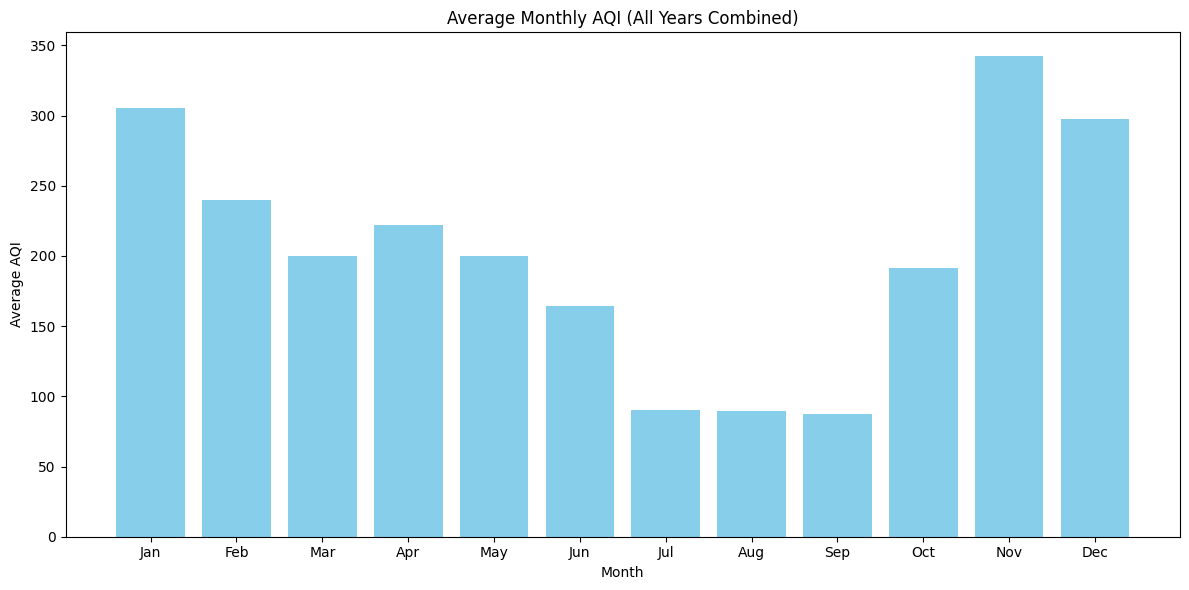

In [13]:
# Print the years in the dataset
print("Years in dataset:", sorted(df['Year'].unique()))

# Calculate monthly averages across all years
monthly_avg = df.groupby('Month')['AQI'].mean()

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(12), monthly_avg.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average Monthly AQI (All Years Combined)')

# Set month names on x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), month_names)
plt.tight_layout()

# Save the plot
plt.savefig('monthly_aqi_all_years.png', dpi=300, bbox_inches='tight')
plt.show()

# If you want to see a specific year, uncomment and modify these lines:
# year = 2021  # Change this to the year you want to see
# year_data = df[df['Year'] == year]
# monthly_avg_year = year_data.groupby('Month')['AQI'].mean()
# plt.figure(figsize=(12, 6))
# plt.bar(range(12), monthly_avg_year.values, color='skyblue')
# plt.title(f'Average Monthly AQI for {year}')

This plot shows the average AQI values for each month, combining data from all years in the dataset. To see which years are included, check the print output above.

# Statistical Analysis of AQI Data
- Analyze trends and patterns
- Calculate correlations between different pollutants
- Test for seasonal variations
- Identify significant changes over years

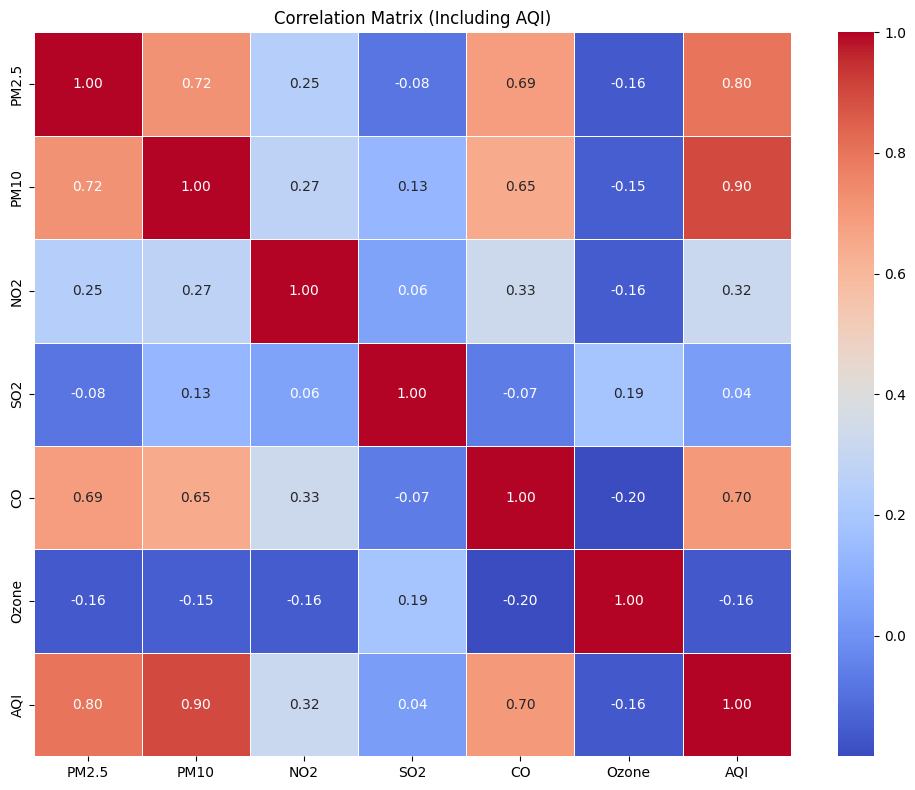


Statistical Summary of Pollutants and AQI:
             PM2.5         PM10          NO2          SO2           CO  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean     90.774538   218.219261    37.184921    20.104921     1.025832   
std      71.650579   129.297734    35.225327    16.543659     0.608305   
min       0.050000     9.690000     2.160000     1.210000     0.270000   
25%      41.280000   115.110000    17.280000     7.710000     0.610000   
50%      72.060000   199.800000    30.490000    15.430000     0.850000   
75%     118.500000   297.750000    45.010000    26.620000     1.240000   
max    1000.000000  1000.000000   433.980000   113.400000     4.700000   

             Ozone          AQI  
count  1461.000000  1461.000000  
mean     36.338871   202.210815  
std      18.951204   107.801076  
min       2.700000    19.000000  
25%      24.100000   108.000000  
50%      32.470000   189.000000  
75%      45.730000   284.000000  
max     115.87000

In [14]:
# Calculate correlations including AQI
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
correlation_matrix = df[pollutants + ['AQI']].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix (Including AQI)')
plt.tight_layout()
plt.show()

# Basic statistical summary
print("\nStatistical Summary of Pollutants and AQI:")
print(df[pollutants + ['AQI']].describe())

# Predict

In [15]:
# Import required libraries for LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


/opt/miniconda3/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violation

In [16]:
# Prepare data for LSTM
# Select features for prediction
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
target = 'AQI'

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform features
X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

# Create sequences (using last 7 days to predict next day)
seq_length = 7
X_seq, y_seq = create_sequences(X_scaled, seq_length)
y_seq = y_scaled[seq_length:]

# Split data into train and test sets (80-20 split)
train_size = int(len(X_seq) * 0.8)
X_train = X_seq[:train_size]
X_test = X_seq[train_size:]
y_train = y_seq[:train_size]
y_test = y_seq[train_size:]

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1163, 7, 6)
Test set shape: (291, 7, 6)


In [17]:
# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, len(features)), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()


/opt/miniconda3/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 64)          │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,137 (121.63 KB)

 Trainable params: 31,137 (121.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - val_loss: 0.0143
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - val_loss: 0.0157
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - val_loss: 0.0127
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 0.0177
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0160
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - val_loss: 0.0157
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - val_loss: 0.0135
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - val_loss: 0.0144
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_loss: 0.0152
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - val_loss: 0.0172
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - val_loss: 0.0187
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_lo

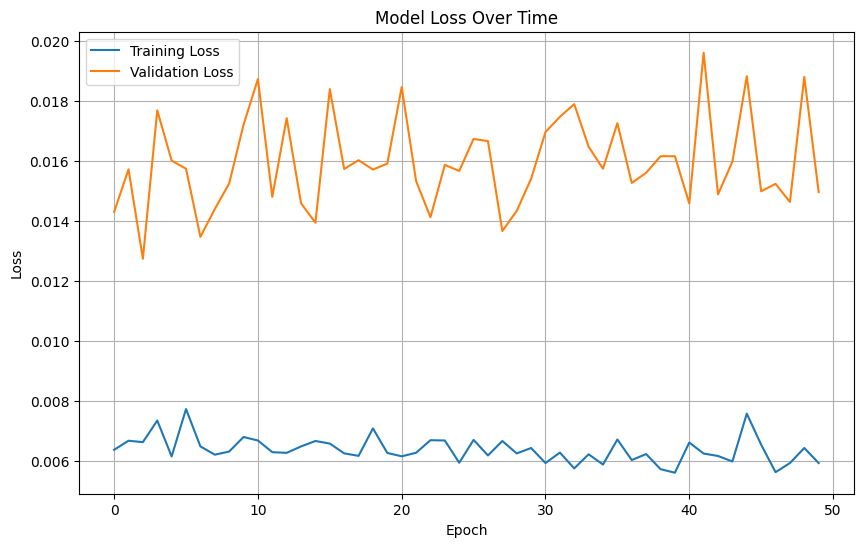

In [22]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Calculate metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'Root Mean Square Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R² Score: {r2:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Root Mean Square Error: 59.26
Mean Absolute Error: 43.15
R² Score: 0.6660


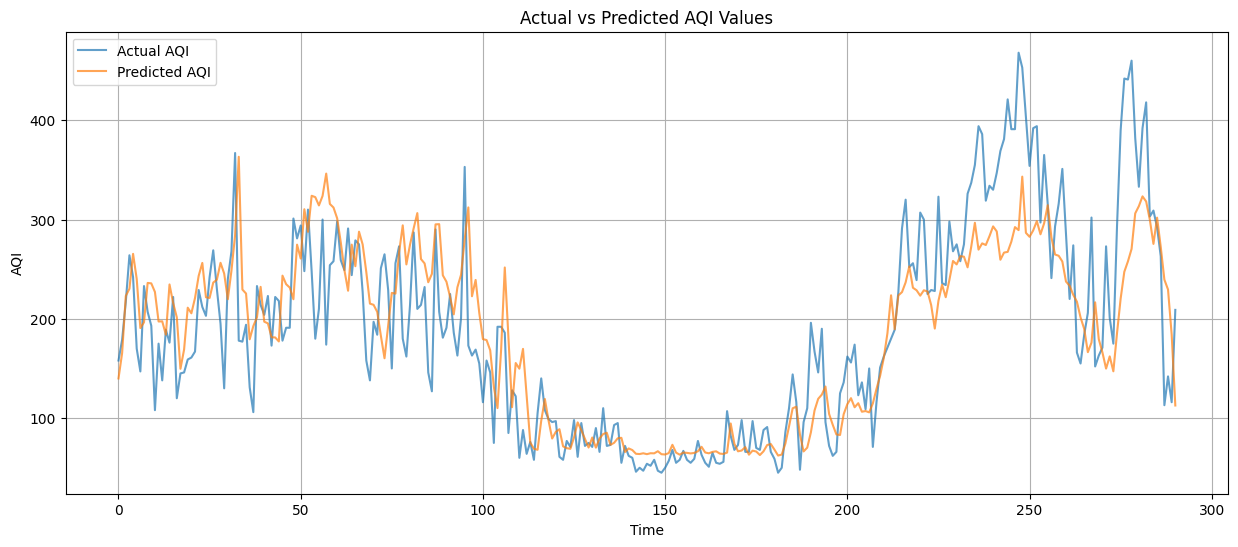

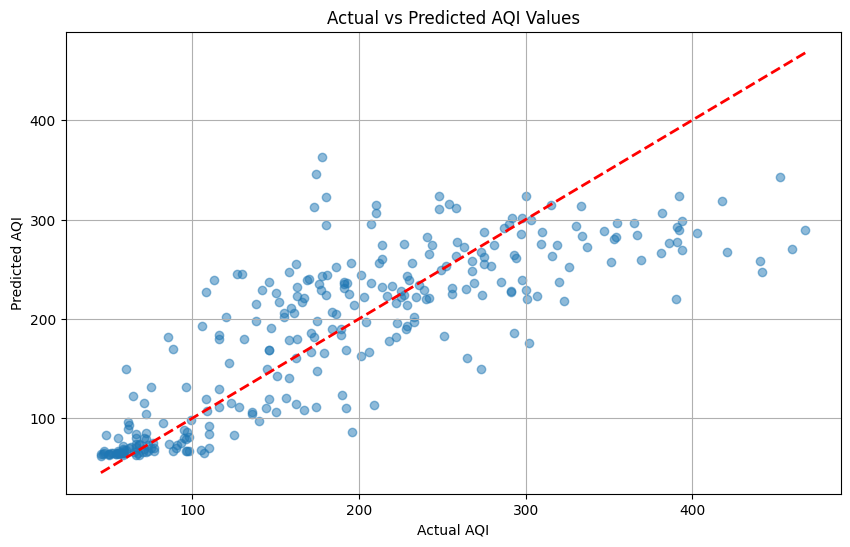

In [24]:
# Plot actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Actual AQI', alpha=0.7)
plt.plot(y_pred, label='Predicted AQI', alpha=0.7)
plt.title('Actual vs Predicted AQI Values')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

# Plot scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.title('Actual vs Predicted AQI Values')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()
